# UTSA CS 3793: Assignment-4

**Last Name - First Name - (abc123)**






## Learning Objectives

*   Deep Learning
*   Computer Vision - Convolutional Neural Network
*   Natural Language Processing - Recurrent Neural Network


## General Information

The base structure and comments are provided on what should be done. You are free to use any code from online sources, but please cite the source properly. Also, you are supposed to create/train the DL model and not use pre-trained models.

**TIPS** while working on this assignment:


*   You will have to keep on updating the model to improve accuracy. Hence, all except the first step (loading the data) would be repeated multiple times. i.e. repeat -- model creation, training & testing.
*   Training a Deep Learning model on real-world datasets and obtain decent accuracy is time consuming. For this assignment, it may take at least 40-60 min, if not more, to train the complete data and get around 35% testing accuracy. Hence, have enough time planned out for finishing the assignment.
*   Because of the large training time, it is impossisble to train each student's model. Hence, you will be required to **save the weights** in a file. These weights can then be loaded for testing purposes. More information is provided in a TensorFlow tutorial [here](https://www.tensorflow.org/tutorials/keras/save_and_load).
*   Please refer to the [TensorFlow Keras API](https://www.tensorflow.org/api_docs/python/tf/keras) for selecting the *'activation function', 'loss', 'optimizer' & 'metrics'*. At least use 'accuracy' as one of the 'metrics'.




##Import Libraries

Write all the import statements here.

In [ ]:
# importing all required libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import random
from google.colab import drive
drive.mount('/content/drive')



# Computer Vision - CNN

The goal of this task is to get hands-on experience in developing, training and testing **Convolutional Neural Network** for the Computer Vision task of Object/Image Classification.

## Load/Prepare Data

(20 points)

In this assignment, will work with the well-known **CIFAR-100 dataset**. The dataset consists of 60000 32x32 color images, which belong to 100 classes, with 600 images per class. There are 50000 training images (500 per class) and 10000 test images (100 per class). The 100 classes in the dataset are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs). More information about the dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html). Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

In this section, you will write code for the following:

*   Load the CIFAR-100 dataset
*   Prepare the data to be used for the DL model creation and training
*   Visualize the data by plotting 100 random images, one each for the 100 classes



In [ ]:
#code to load files provided by CIFAR-10 website
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
# Load the data - training as well as testing
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode="fine")

# Prepare the data that can be used by the next step - creating and training the DL model
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)
# The data from TensforFlow and Keras will only have integer class labels. Each of those 100 integer class labels correspond to the following names, in the correct order
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# These are the string labels for the 20 superclasses. You may not need to use this at all, just provided here for reference.
coarse_labels = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']



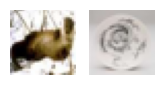

In [ ]:
# Visualize the data by plotting 100 random images, one each for the 100 classes
# Draw 10 images in one row, 10 rows total
plt.figure(figsize=(10,10))
unique_classes = np.unique(y_train)
for i, cls in enumerate(unique_classes):
    # Find a random image belonging to the current class
    idx = np.random.choice(np.where(y_train == cls)[0])
    image = x_train[idx]

    plt.subplot(10, 10, i+1)  # 10 rows, 10 columns, index i+1
    plt.imshow(image)
    plt.axis('off')



## CNN Model Creation

(15 points)

In this section, you will write code for the following:

*   Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
*   Print the DL model summary

In [ ]:
# Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
def create_model():
    model = keras.Sequential([
    keras.layers.Conv2D(128, 3, 1, activation=tf.nn.relu, input_shape = (32,32,3)),
    keras.layers.Flatten(),
    # keras.layers.Dense(4096, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.softmax)
])
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

cifar_model = create_model()

In [ ]:
# Print the DL model summary
print(cifar_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 128)       3584      
                                                                 
 flatten_1 (Flatten)         (None, 115200)            0         
                                                                 
 dense_2 (Dense)             (None, 512)               58982912  
                                                                 
 dense_3 (Dense)             (None, 100)               51300     
                                                                 
Total params: 59,037,796
Trainable params: 59,037,796
Non-trainable params: 0
_________________________________________________________________
None


## Training

(15 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training CIFAR-100 data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/", to be used for the testing phase


In [ ]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/"
cp_callback = keras.callbacks.ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/cifar/",
                                                 save_weights_only=True,
                                                 verbose=1)

# cp_callback = keras.callbacks.ModelCheckpoint(filepath="./cifar/",
#                                                  save_weights_only=True,
#                                                  verbose=1)

In [ ]:
# Train/fit the DL model using the training CIFAR-100 data
# x_train_r = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], x_train.shape[3], 1)
# x_test_r = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], x_test.shape[3], 1)
log = cifar_model.fit(x_train, y_train, epochs=10, callbacks=[cp_callback])

Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 3.4783 - accuracy: 0.1893
Epoch 1: saving model to ./cifar/
1563/1563 [==============================] - 237s 151ms/step - loss: 3.4783 - accuracy: 0.1893
Epoch 2/10
1563/1563 [==============================] - ETA: 0s - loss: 2.6311 - accuracy: 0.3466
Epoch 2: saving model to ./cifar/
1563/1563 [==============================] - 243s 155ms/step - loss: 2.6311 - accuracy: 0.3466
Epoch 3/10
1563/1563 [==============================] - ETA: 0s - loss: 1.9847 - accuracy: 0.4837
Epoch 3: saving model to ./cifar/
1563/1563 [==============================] - 235s 151ms/step - loss: 1.9847 - accuracy: 0.4837
Epoch 4/10
1563/1563 [==============================] - ETA: 0s - loss: 1.2722 - accuracy: 0.6582
Epoch 4: saving model to ./cifar/
1563/1563 [==============================] - 241s 154ms/step - loss: 1.2722 - accuracy: 0.6582
Epoch 5/10
1563/1563 [==============================] - ETA: 0s - loss: 0.7443 - accuracy: 0

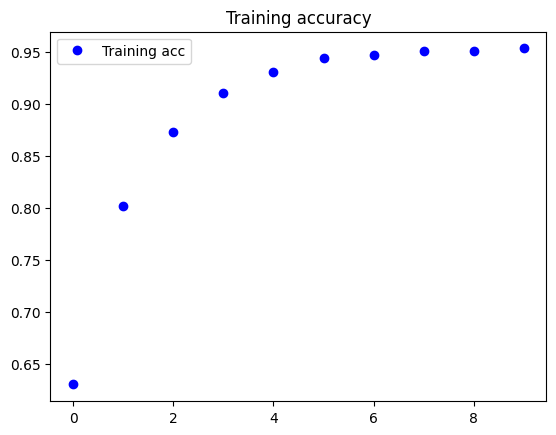

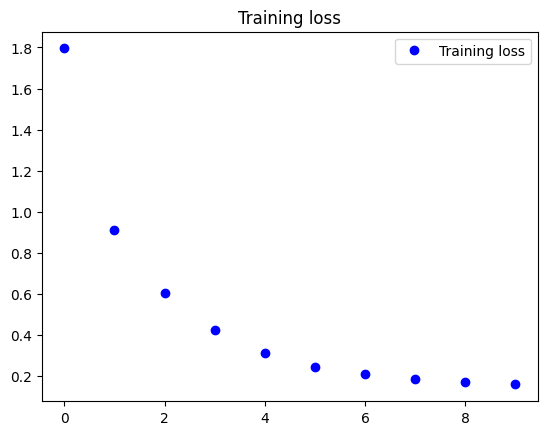

In [ ]:
# Plot the training/validation accuracy and loss
acc = log.history['acc']
# val_acc = log.history['val_acc']
loss = log.history['loss']
# val_loss = log.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training loss')
plt.legend()

plt.show()

## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/cifar/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the CIFAR-100 test dataset. Accuracy value should be printed. Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

This section of the code should be able to run independently from the **training** section, i.e. run this section directly after creating the model.

In [ ]:
# Re-initialize the model
cifar_model = create_model()

In [ ]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/cifar/"
cifar_model.load_weights('/content/drive/My Drive/Colab Notebooks/cifar/')

In [ ]:
# Evaluate the trained DL model on the CIFAR-100 test dataset
cifar_model.evaluate(x_test, y_test)

313/313 [==============================] - 9s 28ms/step - loss: 7.2340 - accuracy: 0.2759


[7.234025001525879, 0.2759000062942505]

# Natural Language Processing - RNN

The goal of this task is to get hands-on experience in developing, training and testing **Recurrent Neural Network** for the Natural Language Processing task of Sentiment Analysis / Text Classification. In this part, you will work with the well-known **Reuters newswire classification dataset**. The dataset consists of newswires from Reuters, labeled over 46 topics. More information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection) or [here](https://keras.io/api/datasets/reuters/). The Keras dataset is a cleaned and organized version of the original dataset and consists of 11,228 newswires (8982 training and 2246 testing). The goal is to classify a newswire into one of the 46 output catergories.


## Load/Prepare Data

(15 points)

In this section, you will write code for the following:

*   Load the Reuters dataset - use the Keras version
 *   Select the vocabulary size while loading the data
 *   The data will be loaded as integer representations for each word
*   Prepare the data to be used for the next steps
 *   Each data entry (newswire) can be of different lengths
 *   Make each newswire consistent - same number of words
 *   'Pad' words (say 0) to get to the standard length or remove words

In [ ]:
# Load the Reuters dataset - use the Keras version
#   Select the vocabulary size while loading the data
#   The data will be loaded as integer representations for each word
max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 64

(x_train, y_train), (x_test, y_test) = keras.datasets.reuters.load_data(num_words=max_features)

# Retrieve the word index file mapping words to indices
word_index = keras.datasets.reuters.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3
# Reverse the word index to obtain a dict mapping indices to words
inverted_word_index = dict((i, word) for (word, i) in word_index.items())

In [ ]:
# Prepare the data to be used for the next steps
#   Each data entry (newswire) can be of different lengths
#   Make each newswire consistent - same number of words
#   'Pad' words (say 0) to get to the standard length or remove words
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [ ]:
y_train = to_categorical(y_train, 46)
y_test = to_categorical(y_test, 46)

## RNN Model Creation

(15 points)

In this section, you will write code for the following:

*   Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
*   Print the DL model summary

In [ ]:
# Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
def create_model():
    model = keras.Sequential(
    #     [
    #     keras.layers.Dense(64, activation='relu', input_shape=(10000,)),
    #     keras.layers.Dense(64, activation='relu'),
    #     keras.layers.Dense(46, activation='softmax')
    # ]
    )
    model.add(Embedding(max_features, 64))
    model.add(SimpleRNN(64, return_sequences=True))
    model.add(SimpleRNN(64, return_sequences=True))
    model.add(SimpleRNN(64, return_sequences=True))
    model.add(SimpleRNN(64))
    model.add(Dense(46, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    return model
reuters_model = create_model()

In [ ]:
# Print the DL model summary
reuters_model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 64)          640000    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, None, 64)          8256      
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, None, 64)          8256      
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, None, 64)          8256      
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 46)                2990      
                                                                 
Total params: 676,014
Trainable params: 676,014
Non-tr

## Training

(15 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training Reuters data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load)), to be used for the testing phase


In [ ]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/"
cp = keras.callbacks.ModelCheckpoint(filepath="./reuters/", save_weights_only=True)

In [ ]:
# Train/fit the DL model using the training Reuters data
log = reuters_model.fit(x_train, y_train, epochs=10, batch_size=128, callbacks=[cp])

Epoch 1/10
71/71 [==============================] - 1s 5ms/step - loss: 1.7952 - acc: 0.6298
Epoch 2/10
71/71 [==============================] - 0s 4ms/step - loss: 0.9097 - acc: 0.8015
Epoch 3/10
71/71 [==============================] - 0s 4ms/step - loss: 0.6070 - acc: 0.8729
Epoch 4/10
71/71 [==============================] - 0s 4ms/step - loss: 0.4224 - acc: 0.9103
Epoch 5/10
71/71 [==============================] - 0s 4ms/step - loss: 0.3121 - acc: 0.9310
Epoch 6/10
71/71 [==============================] - 0s 4ms/step - loss: 0.2424 - acc: 0.9439
Epoch 7/10
71/71 [==============================] - 0s 4ms/step - loss: 0.2083 - acc: 0.9468
Epoch 8/10
71/71 [==============================] - 0s 4ms/step - loss: 0.1852 - acc: 0.9509
Epoch 9/10
71/71 [==============================] - 0s 4ms/step - loss: 0.1711 - acc: 0.9508
Epoch 10/10
71/71 [==============================] - 0s 4ms/step - loss: 0.1593 - acc: 0.9535


dict_keys(['loss', 'acc'])


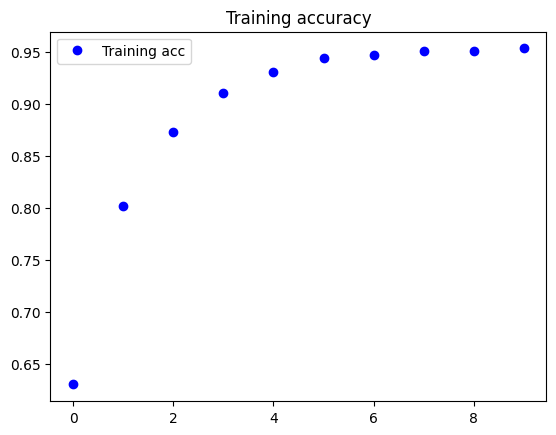

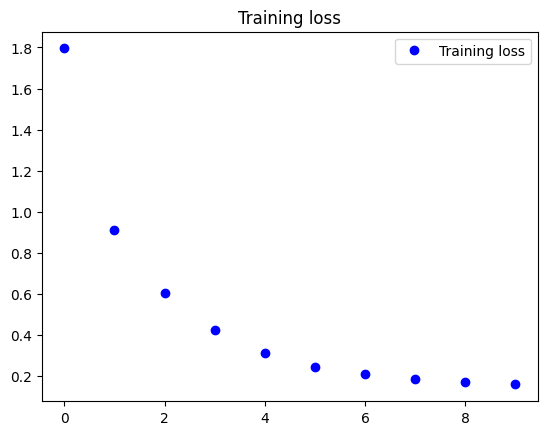

In [ ]:
# Plot the training/validation accuracy and lossprint
print(log.history.keys())
acc = log.history['acc']
# val_acc = log.history['val_acc']
loss = log.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training loss')
plt.legend()

plt.show()

## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the Reuters test dataset. Accuracy value should be printed.

This section of the code should be able to run independently from the **training** section, i.e., run this section directly after creating the model.

In [ ]:
# Re-initialize the model
reuters_model = create_model()


In [ ]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/reuters/"
reuters_model.load_weights('./reuters/')


In [ ]:
# Evaluate the trained DL model on the Reuters test dataset
reuters_model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 666us/step - loss: 1.1631 - acc: 0.7881


[1.1630679368972778, 0.7880676984786987]

# Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Download and zip the folders "/content/drive/My Drive/Colab Notebooks/cifar/" (abc123_cifar_model.zip) and "/content/drive/My Drive/Colab Notebooks/reuters/" (abc123_reuters_model.zip)
4.   Upload the .ipynb file and .zip on Blackboard



## Rubric

*   Computer Vision - CNN
    *   (20 points) Load/Prepare Data
    *   (15 points) CNN Model Creation
    *   (15 points) Training
    *   (15 points) Testing/Evaluation
*   Natural Language Processing - RNN
    *   (15 points) Load/Prepare Data
    *   (15 points) RNN Model Creation
    *   (15 points) Training
    *   (15 points) Testing/Evaluation

